# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , accuracy_score

# Loading The Dataset 

In [2]:
laptops = pd.read_csv('./Datasets/laptop/laptop_prices.csv')
laptops.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Exploratory Data Analysis 

In [3]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [4]:
laptops.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [5]:
laptops.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

# Data Analysis (Univarate, Bi-Varate & Multivarate)

In [6]:
sns.set_style('darkgrid')

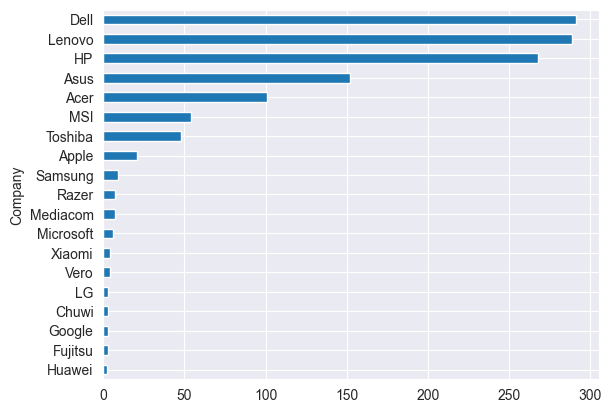

In [7]:
laptops['Company'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

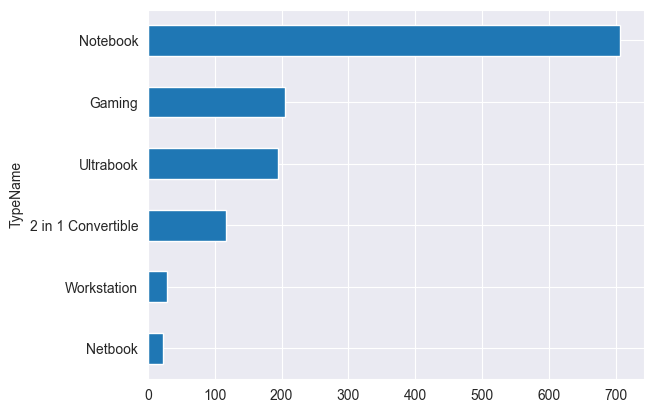

In [8]:
laptops['TypeName'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

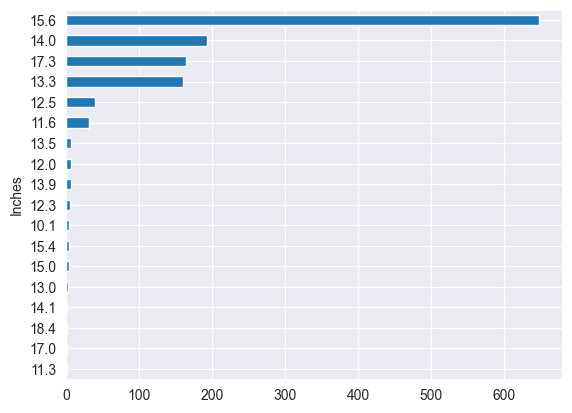

In [9]:
laptops['Inches'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

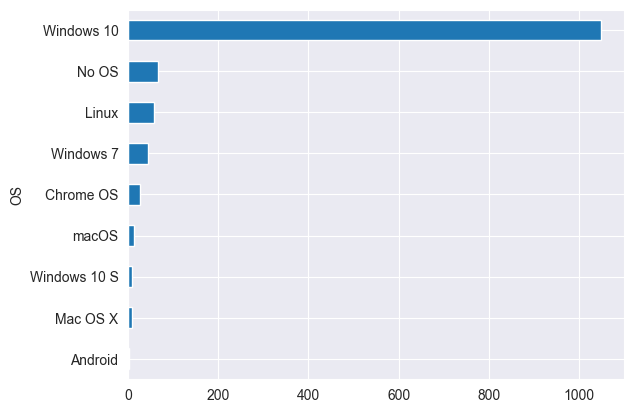

In [10]:
laptops['OS'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

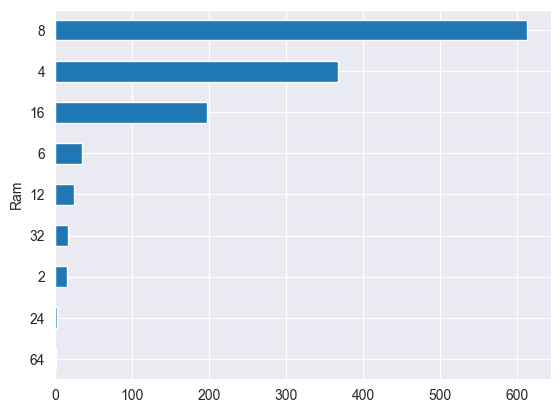

In [11]:
laptops['Ram'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

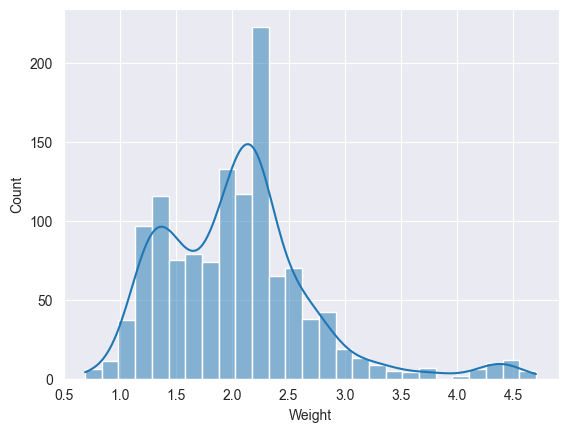

In [12]:
sns.histplot(laptops, x='Weight', kde=True)
plt.show()

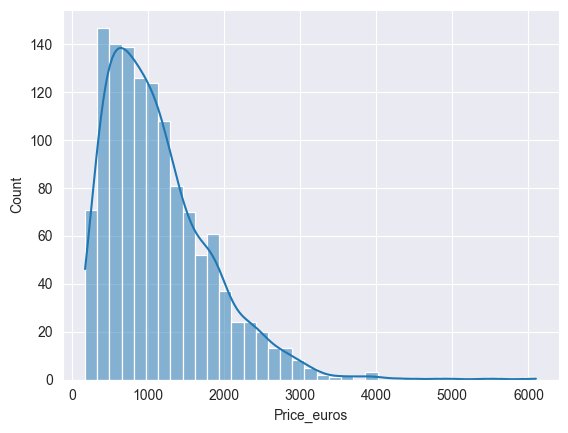

In [13]:
sns.histplot(laptops, x='Price_euros', kde=True)
plt.show()

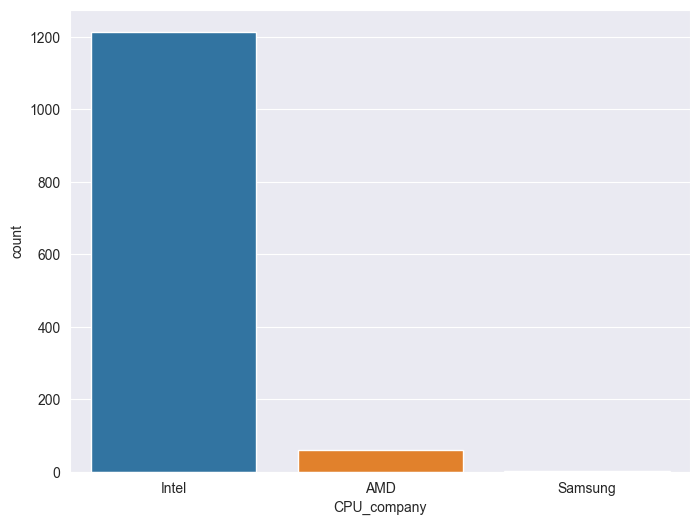

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(laptops, x='CPU_company')
plt.show()

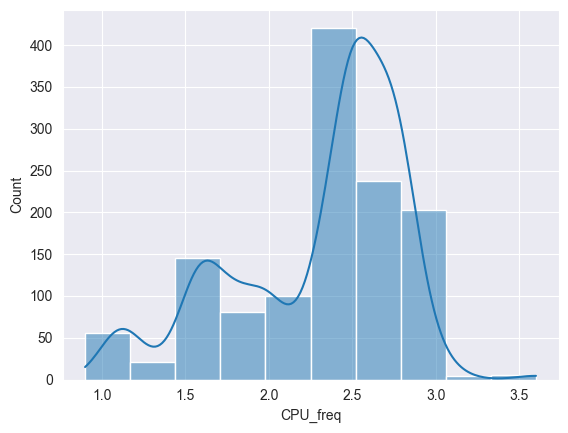

In [15]:
sns.histplot(laptops, x='CPU_freq', kde=True , bins=10)
plt.show()

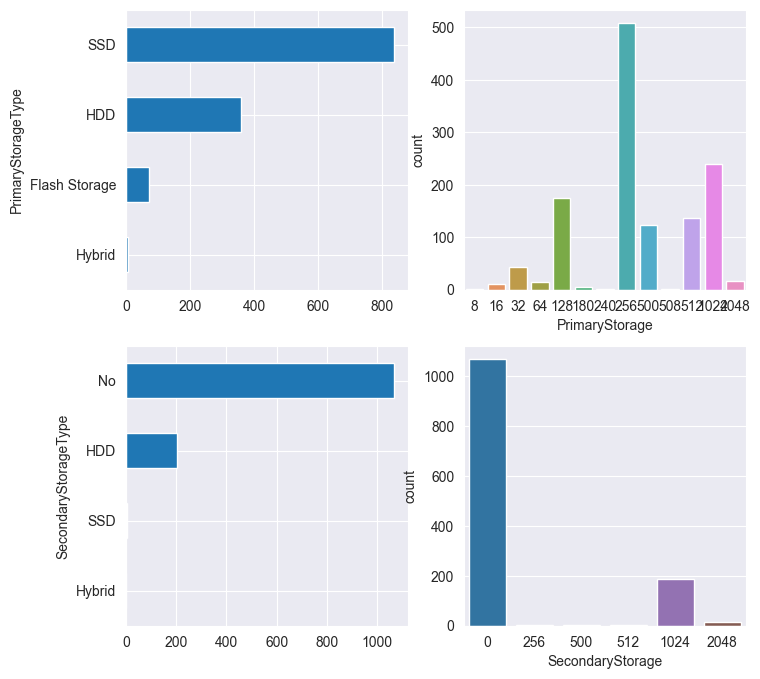

In [16]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
laptops['PrimaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh')

plt.subplot(2, 2, 2)
sns.countplot(laptops, x='PrimaryStorage')

plt.subplot(2, 2, 3)
laptops['SecondaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh')

plt.subplot(2, 2, 4)
sns.countplot(laptops, x='SecondaryStorage')

plt.show()

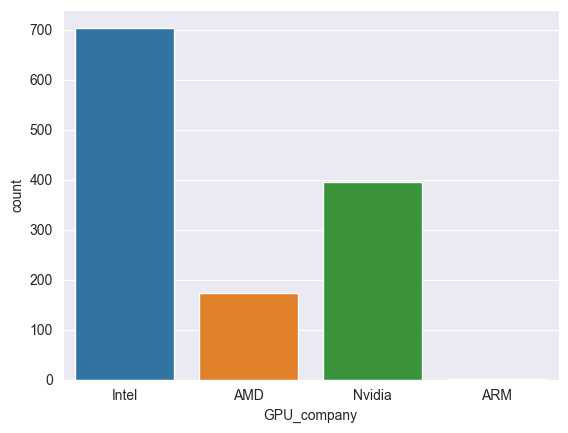

In [17]:
sns.countplot(laptops, x='GPU_company')
plt.show()

# Bi-Varate Analysis

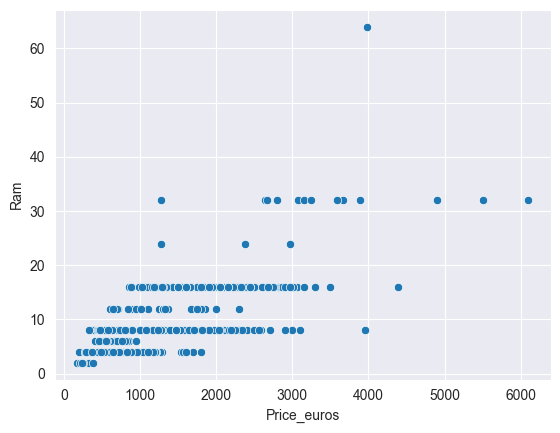

In [18]:
sns.scatterplot(laptops, x='Price_euros', y='Ram')
plt.show()

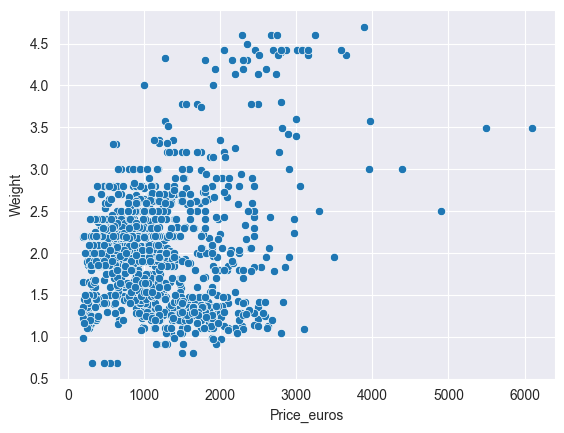

In [19]:
sns.scatterplot(laptops, x='Price_euros', y='Weight')
plt.show()

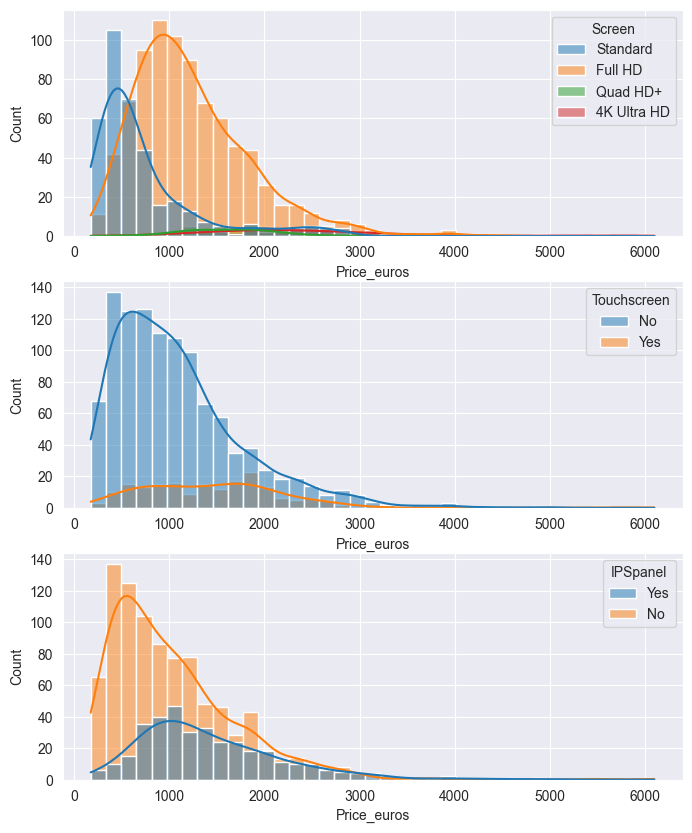

In [20]:
plt.figure(figsize=(8,10))

plt.subplot(3, 1, 1)
sns.histplot(laptops, x='Price_euros', hue='Screen', kde=True)

plt.subplot(3, 1, 2)
sns.histplot(laptops, x='Price_euros', hue='Touchscreen', kde=True)

plt.subplot(3, 1, 3)
sns.histplot(laptops, x='Price_euros', hue='IPSpanel', kde=True)

plt.show()

# Multivarate Analysis

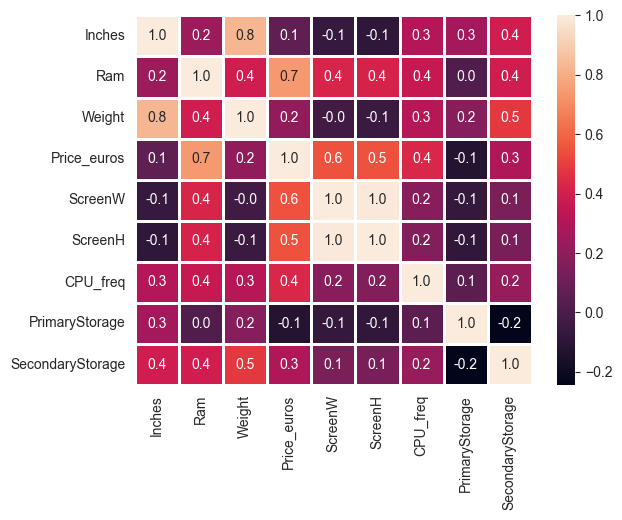

In [21]:
sns.heatmap(laptops.corr(numeric_only=True), annot=True, fmt='.1f',  linewidths=2)
plt.show()

# Machine Learning

In [22]:
laptops.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

# Encoding all the Categorical Data

In [23]:
encoder = LabelEncoder()
for col in laptops.columns:
    if laptops[col].dtype == 'O':
        laptops[col] = encoder.fit_transform(laptops[col])
del(encoder)

In [24]:
laptops

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,14.0,4,5,1.80,638.00,1,1920,...,0,1,2.5,55,128,0,3,2,2,49
1271,10,588,0,13.3,16,5,1.30,1499.00,2,3200,...,0,1,2.5,55,512,0,3,2,2,49
1272,10,196,3,14.0,2,5,1.50,229.00,3,1366,...,0,1,1.6,20,64,0,0,2,2,42
1273,7,2,3,15.6,6,5,2.19,764.00,3,1366,...,0,1,2.5,55,1024,0,1,2,0,92


# Splitting the dataset into Training and Test 

In [25]:
X= laptops.drop(['Price_euros'], axis=1)
y= laptops['Price_euros']

# Train Test Splitting 

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [27]:
X_train.shape

(1020, 22)

In [28]:
X_test.shape

(255, 22)

In [29]:
y_train.shape

(1020,)

In [30]:
y_test.shape

(255,)

# Training using Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

# Evaluating the Model using Different Metrics

In [33]:
mean_absolute_error = mean_absolute_error(y_test, y_pred)

In [34]:
mean_squared_error = mean_squared_error(y_test, y_pred)

In [35]:
r2_score = r2_score(y_test, y_pred)

In [36]:
print(mean_absolute_error)
print(mean_squared_error)
print(r2_score)

257.81294591244114
128178.69055704924
0.7417518679812354


In [37]:
y_test

1179     650.0
342      716.0
649     1584.0
772     1020.0
803     1749.0
         ...  
701      399.0
1105    1413.1
424     2799.0
944     1299.0
65      1983.0
Name: Price_euros, Length: 255, dtype: float64

In [38]:
y_pred

array([ 605.1869299 ,  932.67006773, 1530.85778203,  939.70091451,
       1831.41210589,  957.45389469,  958.51720535,  310.09394846,
       1955.66702779,  767.90265741, 1302.34587587, 1086.00731953,
       1182.27850527, 1911.89184197, 2265.53276754,  852.0603485 ,
       1472.66980935, 1002.78651757, 1868.7917226 , 1993.73616199,
        657.4186317 ,  609.44983936, 1398.22398411, 1738.27611355,
       1110.94030892, 1888.90430006,  879.92129328, 1139.0594172 ,
        756.6063373 , 1152.58067793, 1077.81388473,  639.39432515,
       1060.26847284,  409.40771278, 1278.87083304, 1167.07346369,
       1233.85054269,  719.52760238, 1161.94247698, 1136.49480516,
       1351.10094071,  479.43523815, 1323.06748084, 1265.10581791,
       1073.94732693, 1284.41050548, 1659.83580621,  954.03969035,
       1858.0869409 , 1152.80429276, 1050.49494968,  264.74362412,
       1853.95285198,  363.71507113,  926.25070303, 1367.9972901 ,
       1019.53837197, 1320.88143125, 1328.70003164, 1095.64016